# Analyse Yearly Water Observation Summary Stats over cells

In [1]:
import os, sys

import numpy as np

from numpy import genfromtxt

import pandas as pd
#import pandas.io.data
from pandas_datareader import data, wb
from pandas import DataFrame


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

In [2]:
infile='wofsstats_by_cell_yearly_Oct2Sept.csv'

my_file_csv = os.path.join(os.getcwd(), '../data', infile) 

print(my_file_csv)

/home/547/fxz547/myGithub/geodanalytics/notebooks/../data/wofsstats_by_cell_yearly_Oct2Sept.csv


In [3]:
!head /home/547/fxz547/github/geodata_analytics/notebooks/../data/wofsstats_by_cell_yearly_Oct2Sept.csv

head: cannot open `/home/547/fxz547/github/geodata_analytics/notebooks/../data/wofsstats_by_cell_yearly_Oct2Sept.csv' for reading: No such file or directory


In [4]:
# read csv file into numpy array
my_data = genfromtxt(my_file_csv, delimiter=',')

type(my_data)

numpy.ndarray

In [5]:
my_data.shape

(26785, 6)

In [6]:
# numpy not good at handling heterogenous data. non-numeric data shown as nan

print my_data[:3,:]

[[             nan              nan              nan              nan
               nan              nan]
 [  2.01400000e+03              nan   2.12647000e+05   1.22377740e+07
    1.19260600e+06   1.62951368e+08]
 [  1.98700000e+03              nan   7.36060000e+04   1.59981590e+07
    2.03443000e+05   2.23908841e+08]]


# Using Pandas  to handle heterogeneous tabular data structure with labeled axes 
http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook

In [7]:
pdf = pd.read_csv(my_file_csv)

In [8]:
pdf.head()

,year,cellid,waterpix,clearpix,waterobs,clearobs
0,2014,144_-016,212647,12237774,1192606,162951368
1,1987,143_-033,73606,15998159,203443,223908841
2,1987,144_-042,10394,1635415,17123,2995284
3,1987,123_-035,6989,21195,15135,55136
4,1987,129_-016,782258,14238574,4656771,203970601


In [9]:
# Group by year, the sum the values in each group
df_aus_yearly=pdf.groupby('year').sum()

In [10]:
df_aus_yearly['clearobs'].sum()  # 5x10^12 clear pix obs over 28 years. GrossObsPixels =~ 100 trillions

5133012185249

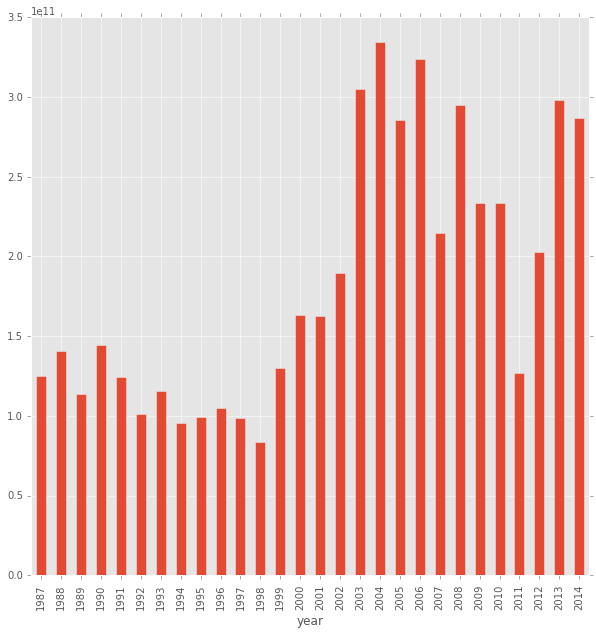

In [11]:
df_aus_yearly.shape
df_aus_yearly['clearobs'].plot(kind='bar')  # not very meaningful

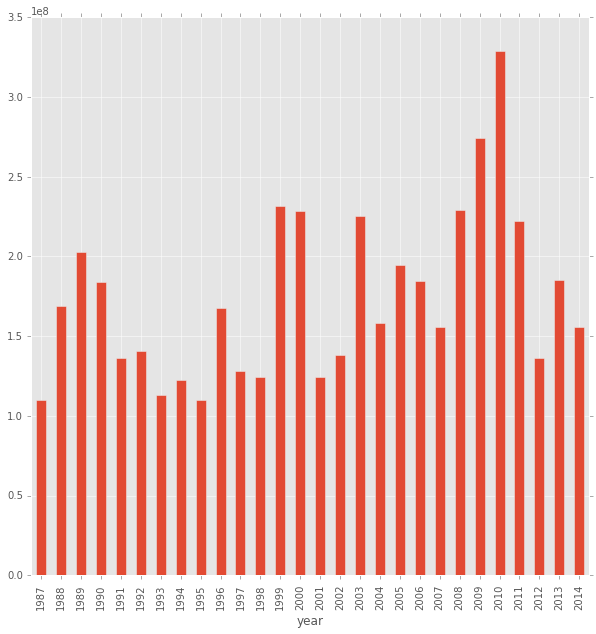

In [12]:
# Unique water pixels observed, had peak at year 2010. break of draught

df_aus_yearly['waterpix'].plot(kind='bar')

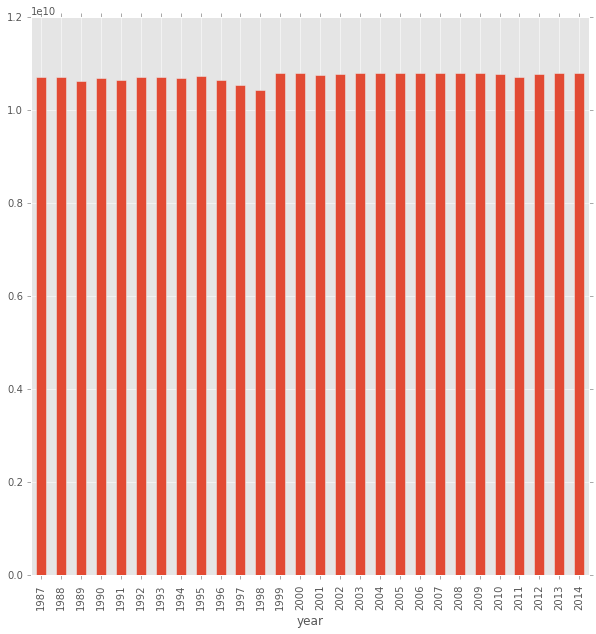

In [13]:
# unique clear observed pixels = Australian coverage. Expected to be Constant 
df_aus_yearly['clearpix'].plot(kind='bar')


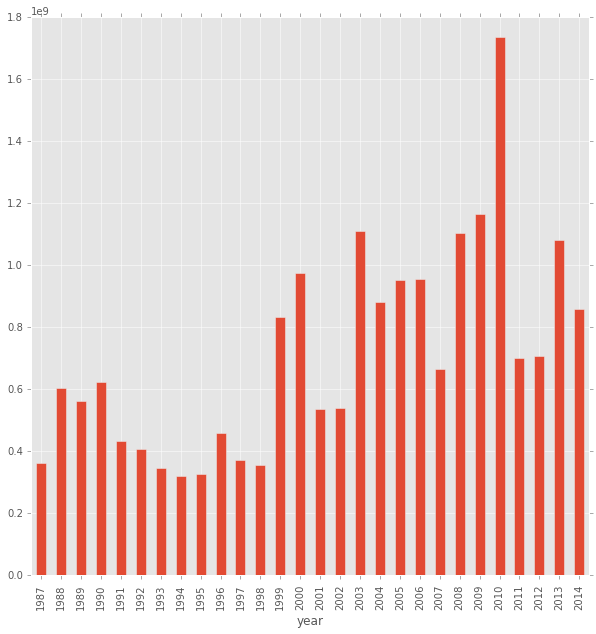

In [14]:
df_aus_yearly['waterobs'].plot(kind='bar') 
# Landsat -7 and 8 launched and operations
# Australian wettest year 2010-11, La Nina events:
# http://takvera.blogspot.com.au/2012/02/drying-trend-in-australia-still-evident.html

In [16]:
# Percentage of water observed. Or frequency of observing water.
# shows peak in 2000 and 2010. 10 year draught in between.
df_aus_yearly['waterpct'] = 100.0*df_aus_yearly.waterobs/df_aus_yearly.clearobs

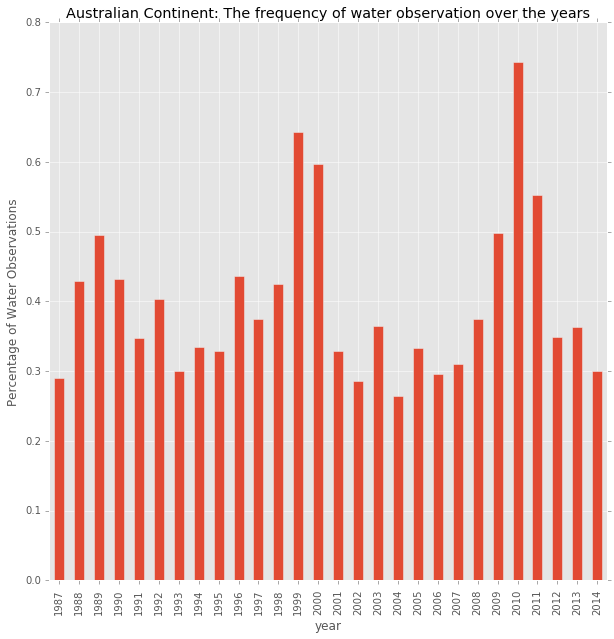

In [35]:
ax = df_aus_yearly['waterpct'].plot(kind='bar')
ax.set_ylabel('Percentage of Water Observations')
ax.set_title("Australian Continent: The frequency of water observation over the years")

# the In-land region Canberra, impacted by 10-year draught clearly seen

In [18]:
#select certain rows
my_cellid=' 149_-036'  #Canberra

df_cell= pdf[pdf.cellid==my_cellid].set_index('year')

In [19]:
df_cell.head()

,cellid,waterpix,clearpix,waterobs,clearobs
year,,,,,
1987,149_-036,142665,12237061,360660,86501369
1988,149_-036,300977,12231948,1594460,87621302
1989,149_-036,299262,12163924,1022815,52532470
1990,149_-036,335708,12236919,2476140,114248730
1991,149_-036,468122,12221562,1476507,68383127


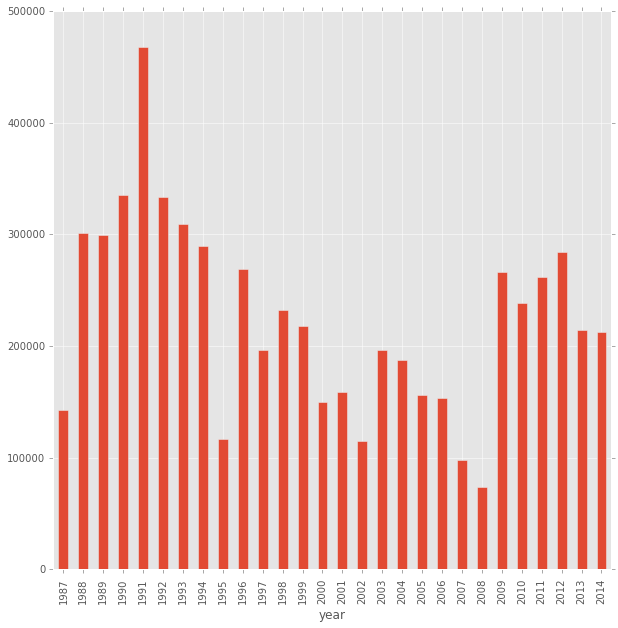

In [20]:
df_cell['waterpix'].plot(kind='bar')  # Unique water pixels observed yearly

In [21]:
df_cell['waterpct'] = 100.0*df_cell.waterobs/df_cell.clearobs

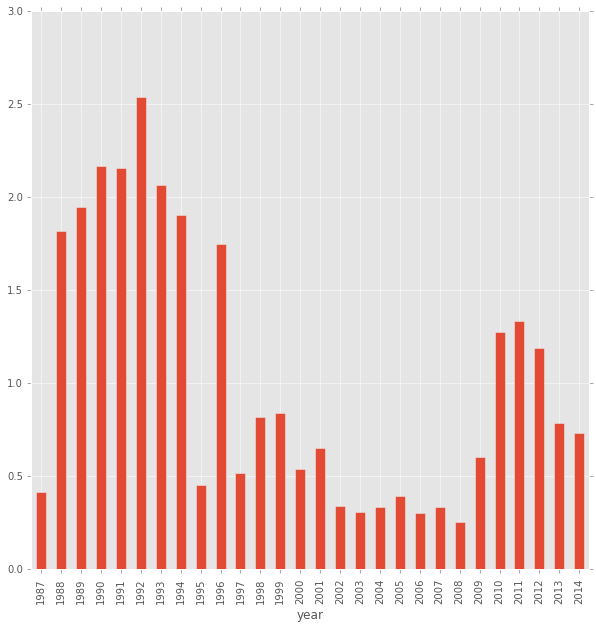

In [22]:
# the In-land region Canberra, impacted by 10-year draught clearly seen

df_cell['waterpct'].plot(kind='bar') 

# 

In [33]:
#select cell_id
my_cellid=' 137_-028'  

def focus_cell(my_cellid):
    df_cell= pdf[pdf.cellid==my_cellid].set_index('year')
    df_cell['waterpct'] = 100.0*df_cell.waterobs/df_cell.clearobs
    
    ax = df_cell['waterpct'].plot(kind='bar') 
    ax.set_ylabel('Percentage of Water Observations')
    ax.set_title("The frequency of water observation in each year")

    
    return df_cell


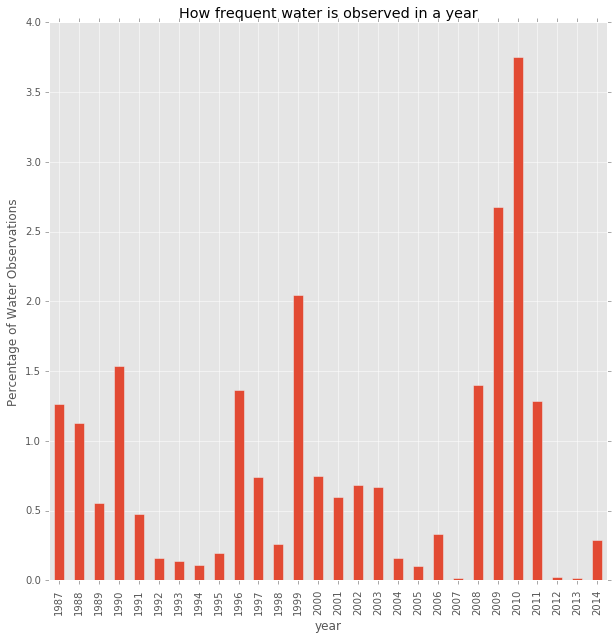

In [32]:
my_cellid=' 137_-028'
my_df = focus_cell(my_cellid)

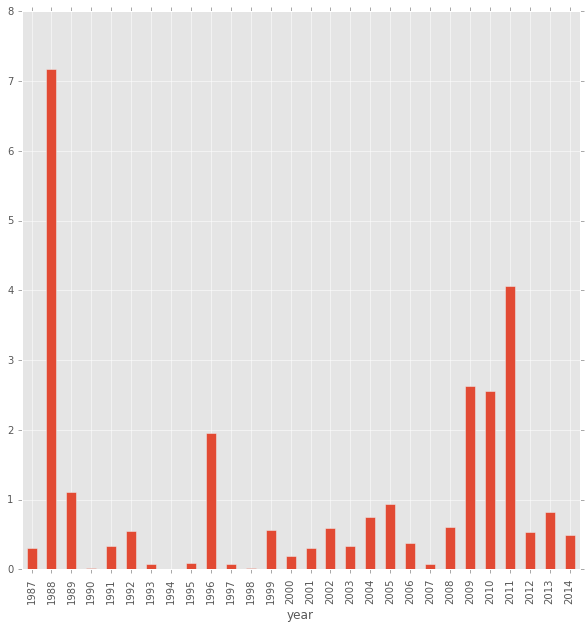

In [25]:
my_cellid=' 139_-031'
my_df = focus_cell(my_cellid)

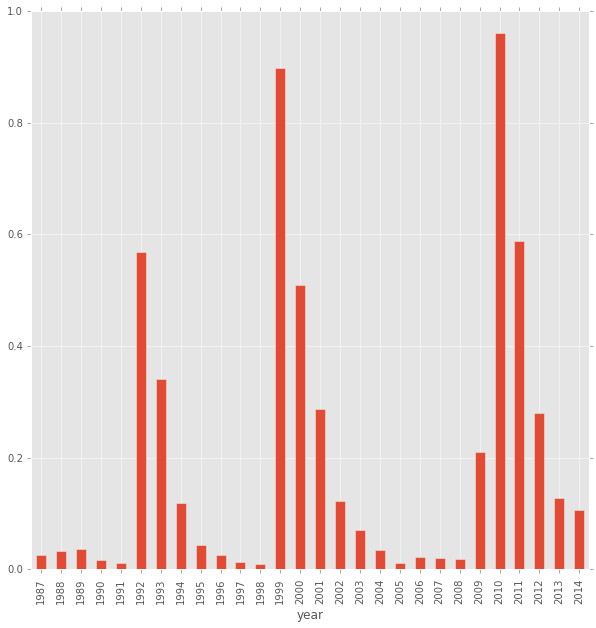

In [26]:
my_cellid=' 142_-032'
my_df = focus_cell(my_cellid)

In [27]:
# http://www.bom.gov.au/climate/updates/articles/a010-southern-rainfall-decline.shtml

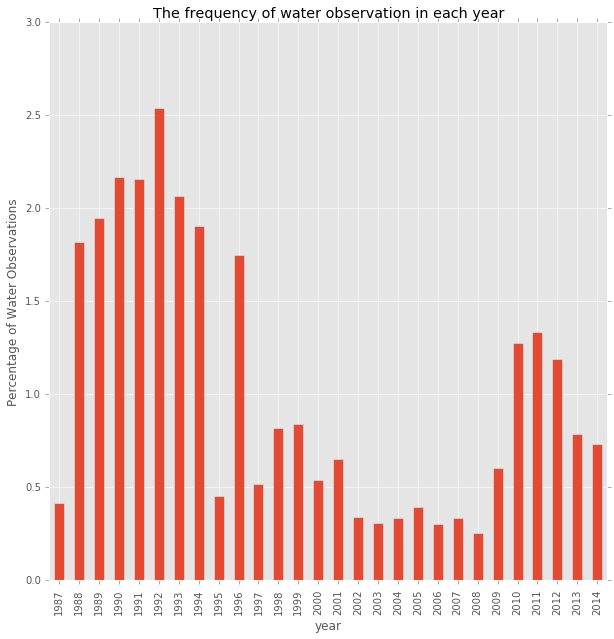

In [34]:
# the In-land region Canberra, impacted by 10-year draught clearly seen

my_cellid=' 149_-036'
my_df = focus_cell(my_cellid)

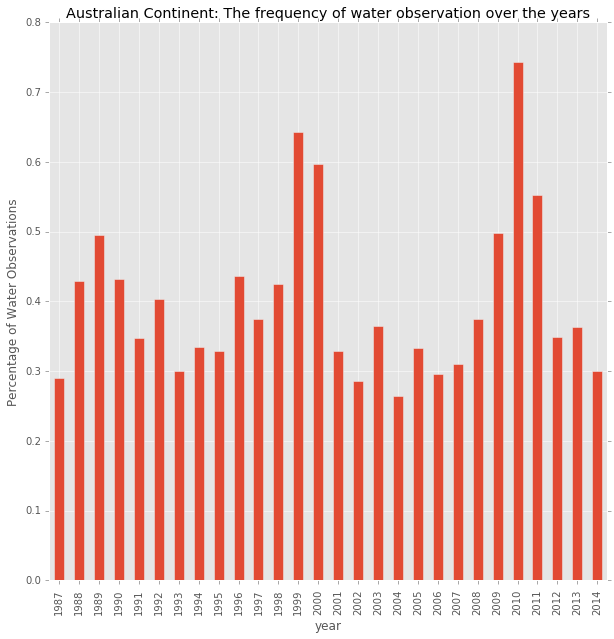

In [36]:
ax = df_aus_yearly['waterpct'].plot(kind='bar')
ax.set_ylabel('Percentage of Water Observations')
ax.set_title("Australian Continent: The frequency of water observation over the years")